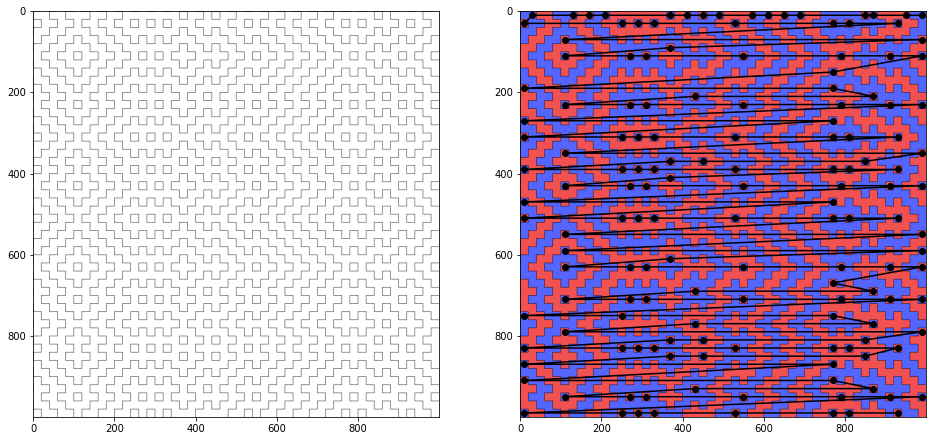

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import random

resolution = (1000, 1000)
grid_spacing = (20, 20)
color_unfilled = (1, 1, 1)
color_walls = (0,0,0)
fill_colors = [(0.33, 0.4, 1), (0.95, 0.32, 0.32)]

im = np.zeros((resolution[0], resolution[1], 3), dtype=np.double)
im[:, :] = color_unfilled

# draw horizontal lines
for y in range(0, im.shape[1], grid_spacing[1]):
    offset = 0 if random.random() < .5 else 1
    for x_num in range(offset, int(im.shape[0]/grid_spacing[0]), 2):
        rr, cc = skimage.draw.line(y, min(x_num*grid_spacing[0], resolution[0]-1), y, min((x_num+1)*grid_spacing[0], resolution[0]-1))
        im[rr, cc] = color_walls

# draw vertical lines
for x in range(0, im.shape[0], grid_spacing[0]):
    offset = 0 if random.random() < .5 else 1
    for y_num in range(offset, int(im.shape[1]/grid_spacing[1]), 2):
        rr, cc = skimage.draw.line(min(y_num*grid_spacing[1], resolution[1]-1), x, min((y_num+1)*grid_spacing[1], resolution[1]-1), x)
        im[rr, cc] = color_walls
        
# color fill
im_filled = np.copy(im)
fill_color_index = 0
fill_positions = []
for y in range(grid_spacing[1]//2, im.shape[1], grid_spacing[1]):
    for x in range(grid_spacing[0]//2, im.shape[0], grid_spacing[0])[::(y//grid_spacing[1])%2*2-1]: # going in a zig-zag pattern
        if np.allclose(im_filled[y, x], color_unfilled):
            fill_mask = skimage.segmentation.flood(im[..., 0], (y, x))
            im_filled[fill_mask] = fill_colors[fill_color_index]
            fill_color_index = (fill_color_index+1) % 2
            fill_positions.append((x,y))
        elif np.allclose(im_filled[y, x], fill_colors[fill_color_index]):
            fill_color_index = (fill_color_index+1) % 2

# plot
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_filled, cmap=plt.cm.gray)
fill_positions = np.array(fill_positions)
ax[1].plot(fill_positions[:,0], fill_positions[:,1], 'o-', c="k")
plt.show()